# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df = pd.merge(mouse_metadata, study_results)
combine_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice.
combine_df['Mouse ID'].nunique()

249

In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_df[combine_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_unique = duplicate_mice['Mouse ID'].unique()
duplicate_mice_unique


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combine_df[combine_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_df = combine_df[~combine_df['Mouse ID'].isin(duplicate_mice_unique)]
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
combine_df['Mouse ID'].nunique()

248

## Summary Statistics

In [37]:
grouped = combine_df.groupby('Drug Regimen')

# Calculate the statistics for 'Tumor Volume (mm3)'
summary_stats = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Display the summary statistics DataFrame
summary_stats



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    StdDev='std',
    SEM='sem'
).reset_index()

# Display the summary statistics DataFrame
summary_stats

,Drug Regimen,Mean,Median,Variance,StdDev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

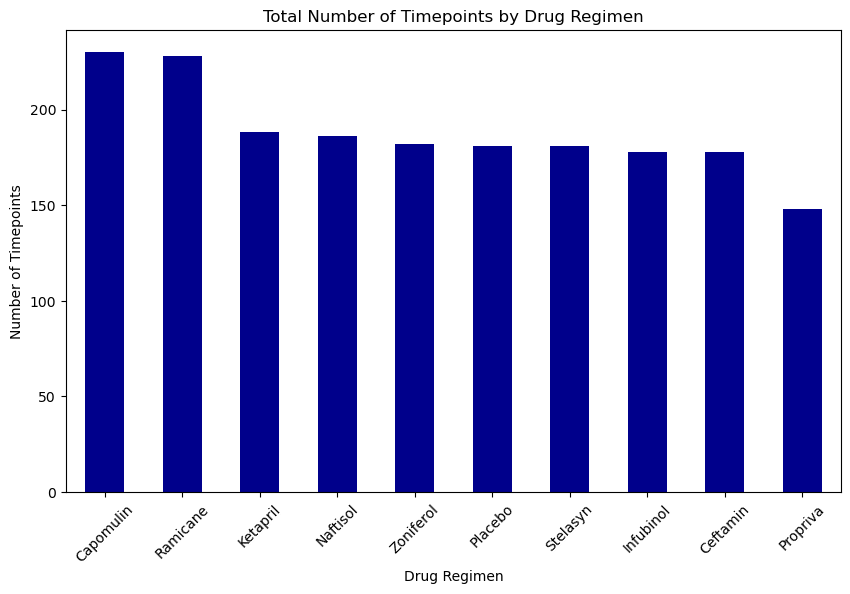

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = combine_df['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', color='darkblue', figsize=(10, 6))
plt.title('Total Number of Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)

# Show the plot
plt.show()

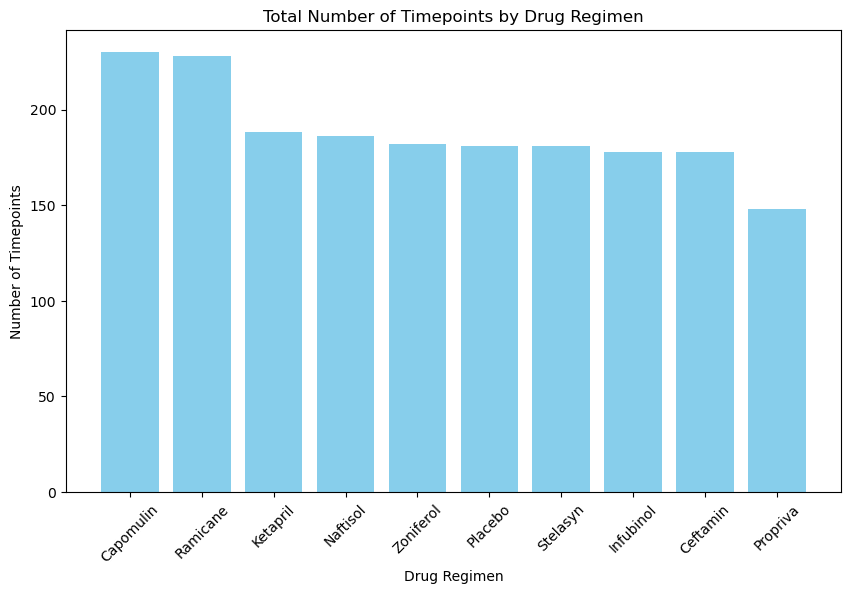

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')
plt.title('Total Number of Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)

# Show the plot
plt.show()

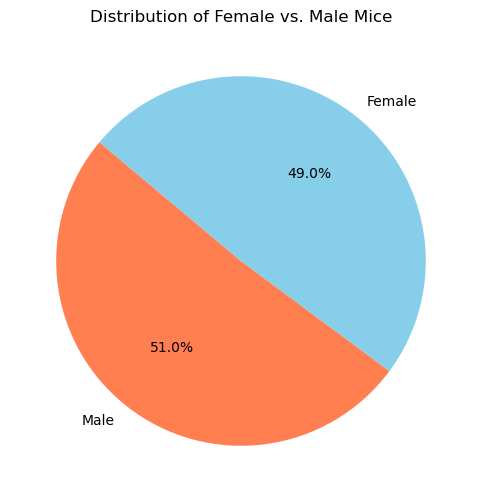

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = combine_df['Sex'].value_counts()

# Create a pie plot using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['coral', 'skyblue'], startangle=140, figsize=(6, 6))
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('') 

# Show the plot
plt.show()

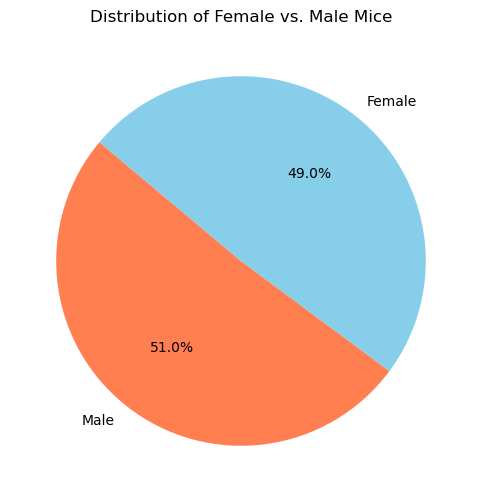

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['coral', 'skyblue'], startangle=140)
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [59]:

# List of treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty dictionary to store outliers by treatment regimen
outliers_by_regimen = {}

# Iterate through each treatment regimen
for treatment in treatments:
    # Subset data for the current treatment regimen
    subset_data = combine_df[combine_df['Drug Regimen'] == treatment]
    
    # Calculate the quartiles
    quartiles = subset_data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers
    outliers = subset_data[(subset_data['Tumor Volume (mm3)'] < lower_bound) | (subset_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Store outliers in the dictionary
    outliers_by_regimen[treatment] = outliers

# Print or display the outliers for each regimen
for treatment, outliers in outliers_by_regimen.items():
    if not outliers.empty:
        print(f"Potential outliers for {treatment}:")
        print(outliers)


Potential outliers for Capomulin:
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
18           25.472143                 1  
19           23.343598                 1  
Potential outliers for Ramicane:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
9           22.050126                 1  


In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_df[combine_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_unique = duplicate_mice['Mouse ID'].unique()
duplicate_mice_unique


array(['g989'], dtype=object)

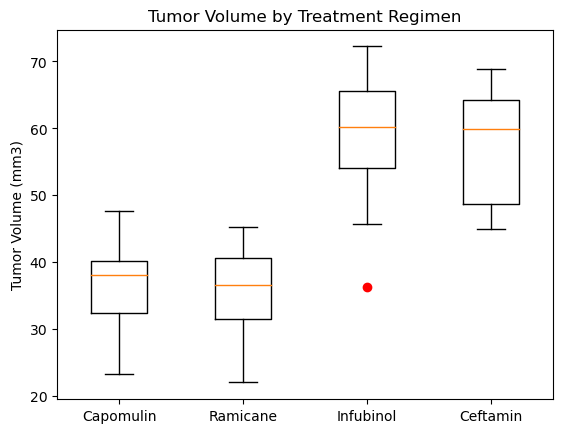

In [60]:
plt.boxplot(tumor_volume_data, labels=treatments, sym='ro')
plt.title('Tumor Volume by Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

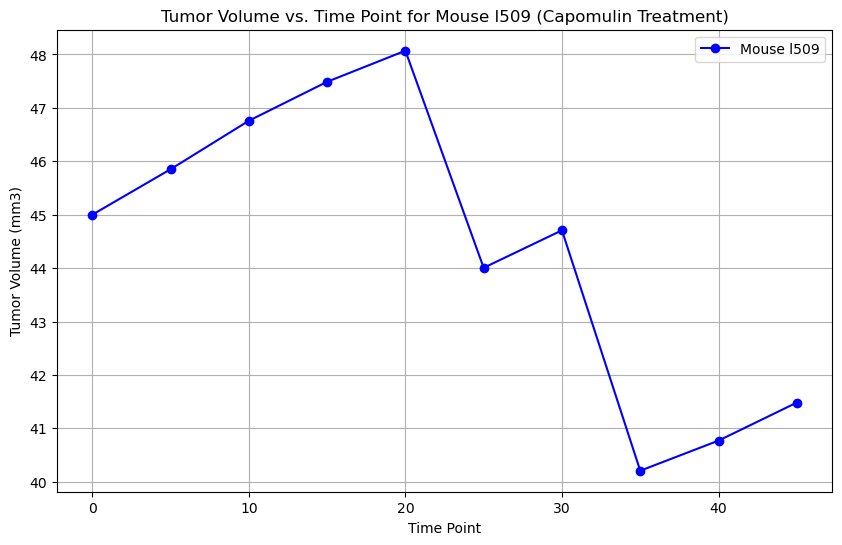

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_id = 'l509' 

# Filter the data for the selected mouse and Capomulin treatment
capomulin_data = combine_df[(combine_df['Mouse ID'] == capomulin_mouse_id) & (combine_df['Drug Regimen'] == 'Capomulin')]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse {capomulin_mouse_id}')
plt.title(f'Tumor Volume vs. Time Point for Mouse {capomulin_mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

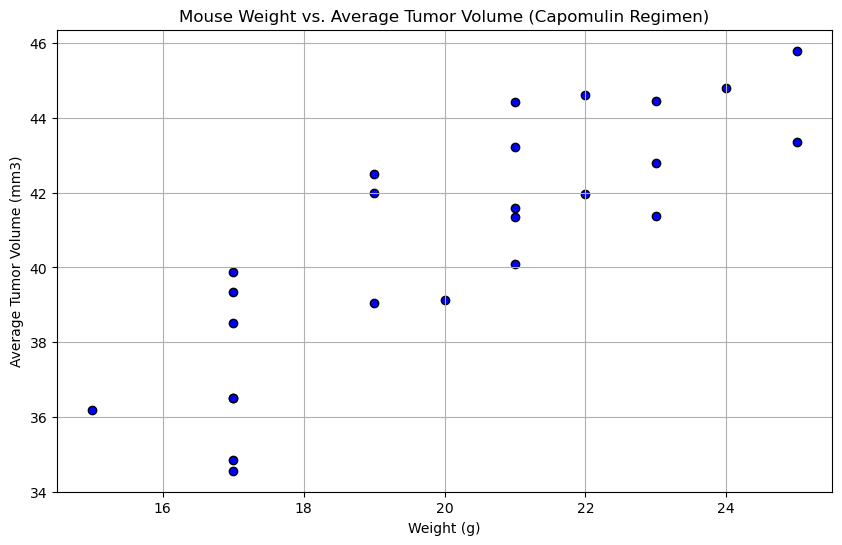

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combine_df[combine_df['Drug Regimen'] == 'Capomulin']

# Group data by 'Mouse ID' and calculate average tumor volume and weight
capomulin_grouped = capomulin_data.groupby('Mouse ID').agg(
    Average_Weight=('Weight (g)', 'mean'),
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean')
).reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_grouped['Average_Weight'], capomulin_grouped['Average_Tumor_Volume'], c='blue', marker='o', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Show the plot
plt.show()

## Correlation and Regression

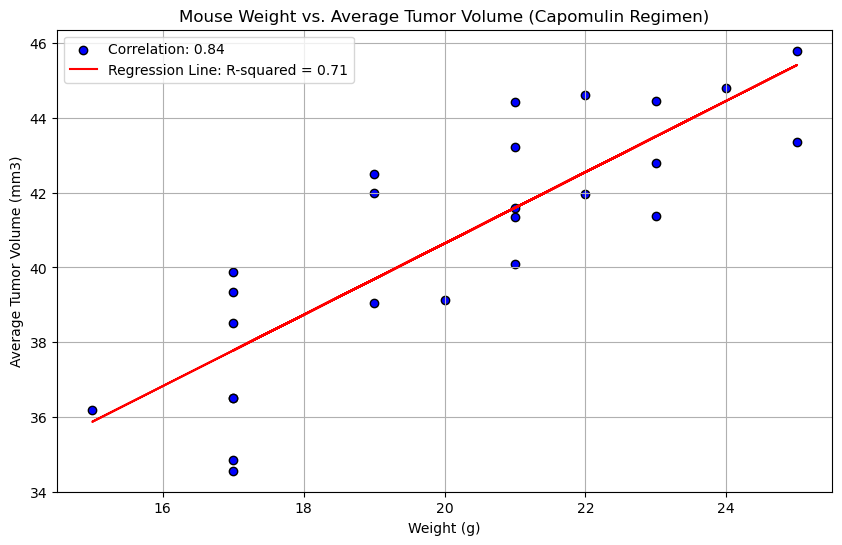

In [66]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress


# Filter data for the Capomulin regimen
capomulin_data = combine_df[combine_df['Drug Regimen'] == 'Capomulin']

# Group data by 'Mouse ID' and calculate average tumor volume and weight
capomulin_grouped = capomulin_data.groupby('Mouse ID').agg(
    Average_Weight=('Weight (g)', 'mean'),
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean')
).reset_index()

# Calculate the correlation coefficient
correlation = capomulin_grouped['Average_Weight'].corr(capomulin_grouped['Average_Tumor_Volume'])

# Create a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(capomulin_grouped['Average_Weight'], capomulin_grouped['Average_Tumor_Volume'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_grouped['Average_Weight'], capomulin_grouped['Average_Tumor_Volume'], c='blue', marker='o', edgecolors='black', label=f'Correlation: {correlation:.2f}')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add the regression line to the plot
regression_line = slope * capomulin_grouped['Average_Weight'] + intercept
plt.plot(capomulin_grouped['Average_Weight'], regression_line, color='red', label=f'Regression Line: R-squared = {r_value**2:.2f}')

plt.legend()
plt.grid(True)

# Show the plot
plt.show()
